In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
data = pd.read_excel("/kaggle/input/ANZ synthesised transaction dataset.xlsx")

In [115]:
pd.options.display.max_columns = None
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [117]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [118]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [119]:
data['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [120]:
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [121]:
data['first_name'].value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

In [122]:
import seaborn as sns

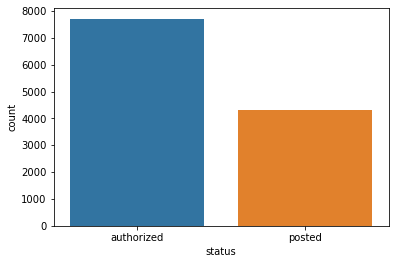

In [123]:
sns.countplot(data['status'])

In [124]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

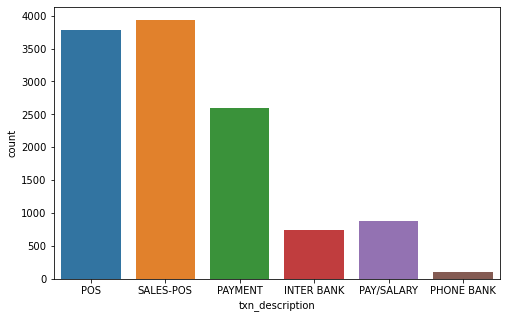

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(data['txn_description'])

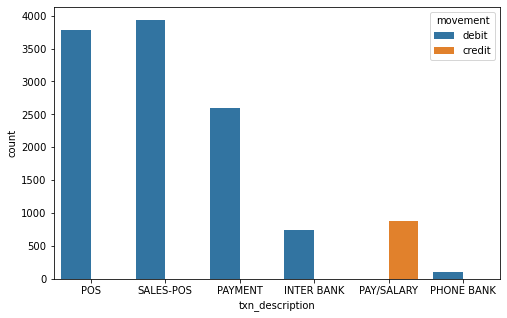

In [126]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['txn_description'], hue='movement',data=data)

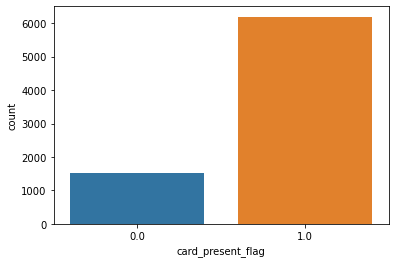

In [127]:
sns.countplot(data['card_present_flag'])

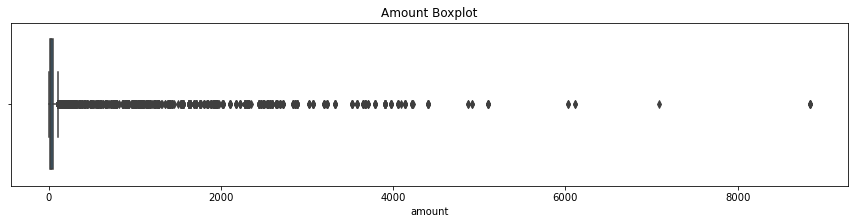

In [128]:
plt.figure(figsize=(15,3))
plt.title('Amount Boxplot')
sns.boxplot(data['amount'])

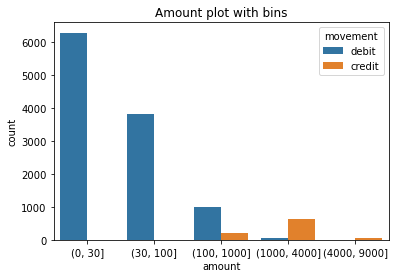

In [129]:
plt.title('Amount plot with bins')
sns.countplot(pd.cut(data['amount'],[0,30,100,1000,4000,9000]), hue='movement',data=data)

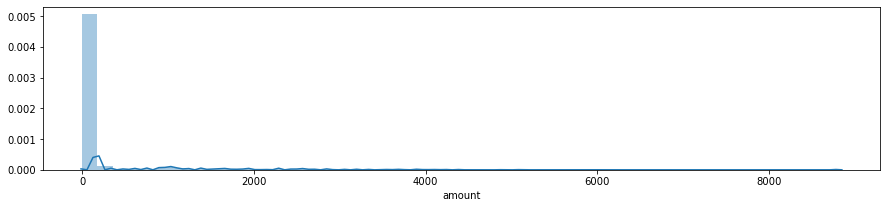

In [130]:
plt.figure(figsize=(15,3))
sns.distplot(data['amount'])

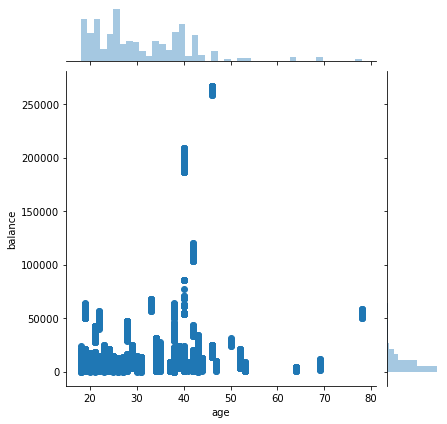

In [131]:
sns.jointplot(x='age',y='balance',data=data)

In [132]:
data['balance'].sort_values()

792           0.24
837           0.25
5801          0.98
1361          1.02
237           2.38
           ...    
10715    266981.30
10709    267028.97
10637    267050.66
10620    267093.66
10467    267128.52
Name: balance, Length: 12043, dtype: float64

In [133]:
data.sort_values(by='balance')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
792,authorized,1.0,NaN,ACC-1217063613,AUD,147.61 -37.82,POS,a39e17e7-8ca2-4a62-8ad7-6e7c841fc579,NaN,Kimberly,0.24,2018-08-07,F,27,Lara,VIC,2018-08-07T09:25:17.000+0000,14.73,38a2377f941d4504a96a8d6541d897d6,Australia,CUS-1739931018,144.41 -38.02,debit
837,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,f6d24b03-5ca8-4cb3-83e2-73db22103a8a,NaN,Michael,0.25,2018-08-07,M,38,Rowville,VIC,2018-08-07T15:34:37.000+0000,5.46,34055a1bc26942a69ee70eab55d29cd5,Australia,CUS-2142601169,145.25 -37.91,debit
5801,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,SALES-POS,a1ca1b7e-a737-4fc8-b070-3e606f52c0d6,NaN,Michael,0.98,2018-09-14,M,38,Margaret River,WA,2018-09-14T20:08:54.000+0000,5.47,2fc1fc588217444aa9c03a070f94512c,Australia,CUS-2142601169,115.07 -33.95,debit
1361,authorized,1.0,NaN,ACC-2681137560,AUD,151.11 -33.99,POS,1965f16b-c400-4611-8367-28a7203711cd,NaN,Nathaniel,1.02,2018-08-11,M,31,Rhodes,NSW,2018-08-11T11:56:49.000+0000,6.02,87f022d08ad448e0ad1668e6bd1241c4,Australia,CUS-2083971310,151.09 -33.83,debit
237,authorized,1.0,NaN,ACC-574997646,AUD,150.79 -33.64,POS,e118ada1-248d-407c-8e8c-553cbc134cfd,NaN,Mackenzie,2.38,2018-08-02,F,18,Punchbowl,NSW,2018-08-02T16:23:36.000+0000,36.17,cb538f413d8e42e48b75188da75f8706,Australia,CUS-586638664,151.06 -33.92,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,authorized,1.0,NaN,ACC-2014856841,AUD,144.99 -37.90,POS,37ef33f1-3421-43ca-941f-38ddfbfe61d2,NaN,Patrick,266981.30,2018-10-21,M,46,Melbourne,VIC,2018-10-21T15:19:07.000+0000,47.67,0ffb3be1e1c3479ea008836af0e0c64d,Australia,CUS-2370108457,144.96 -37.82,debit
10709,authorized,1.0,NaN,ACC-2014856841,AUD,144.99 -37.90,SALES-POS,8b13dcb3-04e0-43aa-b3f2-f8f452d06c2d,NaN,Patrick,267028.97,2018-10-21,M,46,Sunshine,VIC,2018-10-21T14:33:13.000+0000,21.69,bf40d52ea2a940a1bc2c529bced62b71,Australia,CUS-2370108457,144.83 -37.78,debit
10637,posted,NaN,NaN,ACC-2014856841,AUD,144.99 -37.90,PAYMENT,NaN,NaN,Patrick,267050.66,2018-10-20,M,46,NaN,NaN,2018-10-20T23:00:00.000+0000,43.00,782a6d26da574671a5b09aefb38bc3c3,Australia,CUS-2370108457,NaN,debit
10620,authorized,1.0,NaN,ACC-2014856841,AUD,144.99 -37.90,POS,d74f6467-029d-4ef5-9046-39db38104a5c,NaN,Patrick,267093.66,2018-10-20,M,46,Balwyn North,VIC,2018-10-20T21:05:59.000+0000,34.86,ec6a8341a9464bffacad6c2cb7532023,Australia,CUS-2370108457,145.09 -37.79,debit


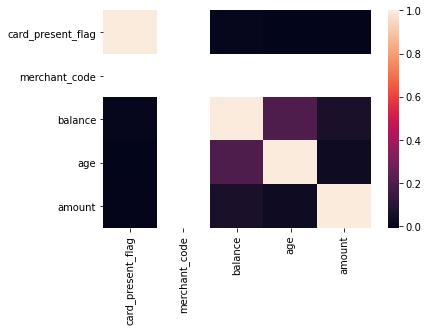

In [134]:
sns.heatmap(data.corr())

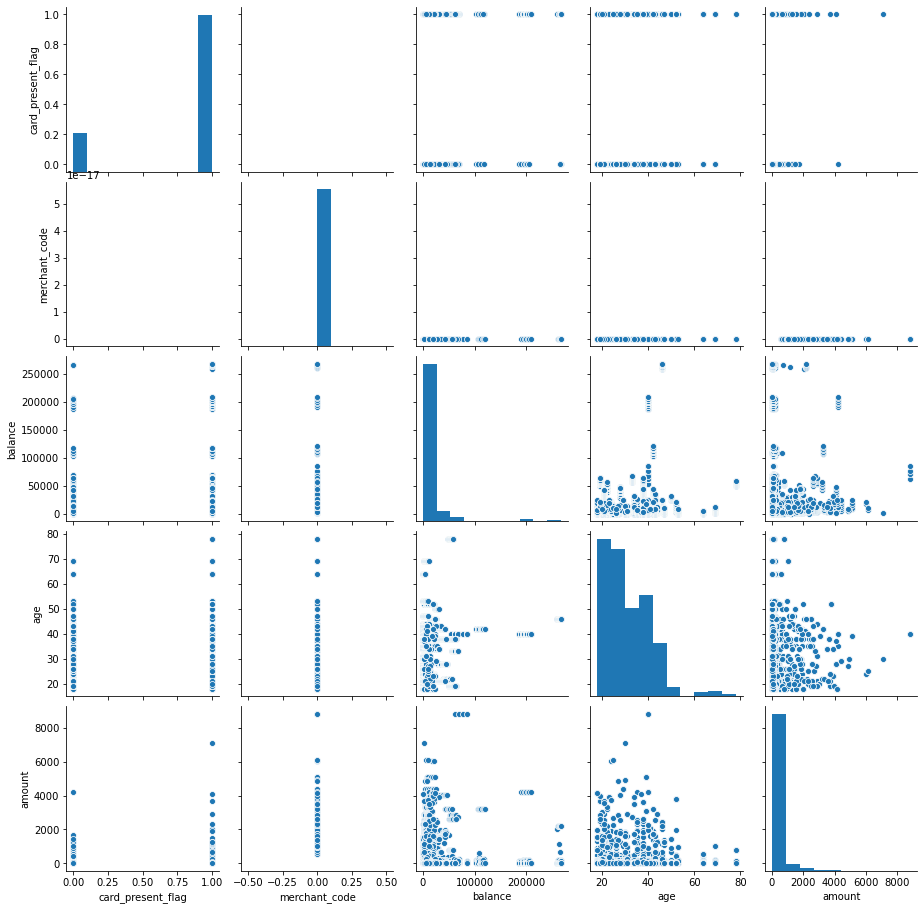

In [135]:
sns.pairplot(data)

In [136]:
data['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [137]:
print(data['status'].value_counts())
print(data['movement'].value_counts())

authorized    7717
posted        4326
Name: status, dtype: int64
debit     11160
credit      883
Name: movement, dtype: int64


In [138]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [139]:
new=data['long_lat'].str.split(" ", n = 1, expand = True)

In [140]:
data['long']=new[0].str.rstrip()
data['lat']=new[1]

In [141]:
data['long'].astype('float64')
data['lat'].astype('float64')

0       -27.95
1       -27.95
2       -33.94
3       -27.66
4       -27.95
         ...  
12038   -29.47
12039   -33.87
12040   -33.89
12041   -37.76
12042   -33.77
Name: lat, Length: 12043, dtype: float64

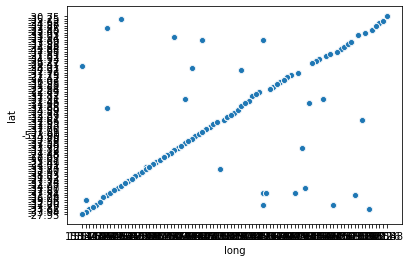

In [142]:
sns.scatterplot(x='long',y='lat',data=data)

In [143]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95


In [144]:
data[['date','age']]

,date,age
0,2018-08-01,26
1,2018-08-01,26
2,2018-08-01,38
3,2018-08-01,40
4,2018-08-01,26
...,...,...
12038,2018-10-31,30
12039,2018-10-31,20
12040,2018-10-31,28
12041,2018-10-31,69


In [145]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [146]:
data['day'] = pd.DatetimeIndex(data['date']).day

In [147]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1


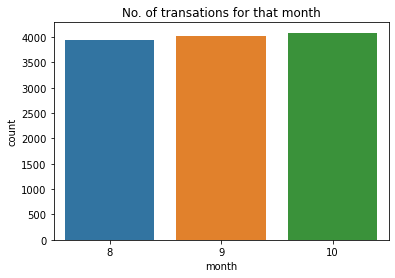

In [148]:
plt.title('No. of transations for that month')
sns.countplot(data['month'])

In [149]:
data['month'].value_counts()

10    4087
9     4013
8     3943
Name: month, dtype: int64

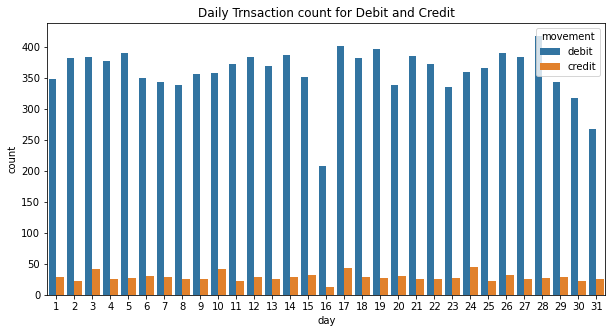

In [150]:
plt.figure(figsize=(10,5))
plt.title('Daily Trnsaction count for Debit and Credit')
sns.countplot(x=data['day'],hue='movement',data=data)

In [151]:
group_by_month=data.groupby('month')

In [152]:
group_by_month.get_group(8)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,authorized,1.0,NaN,ACC-588564840,AUD,151.27 -33.76,SALES-POS,edadc46b-f158-4c81-a040-7f615aaf9c4d,NaN,Isaiah,12624.72,2018-08-31,M,23,Castle Hill,NSW,2018-08-31T23:01:41.000+0000,21.86,4291ddcf81c54f5b9a420289f679f0a1,Australia,CUS-1462656821,151.01 -33.73,debit,151.27,-33.76,8,31
3939,authorized,1.0,NaN,ACC-2265520058,AUD,151.27 -33.85,SALES-POS,6fcf2543-343c-497c-ab74-63660c75cac5,NaN,Catherine,3295.80,2018-08-31,F,26,Bondi Beach,NSW,2018-08-31T23:15:46.000+0000,43.57,cb130761591b4095b1fb922aba36ec48,Australia,CUS-331942311,151.27 -33.89,debit,151.27,-33.85,8,31
3940,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,SALES-POS,9f3694c1-cdf2-4a95-9908-1e590194a552,NaN,Jeffrey,3288.26,2018-08-31,M,30,Chermside,QLD,2018-08-31T23:29:51.000+0000,14.46,42f4afcfcf0d475aacb31c845ce67ad4,Australia,CUS-860700529,153.03 -27.39,debit,153.05,-27.61,8,31
3941,authorized,1.0,NaN,ACC-2231965366,AUD,144.96 -37.84,POS,ad1404e0-42fe-4df6-ab2b-ed1b8fd73c1a,NaN,Linda,10213.95,2018-08-31,F,35,Docklands,VIC,2018-08-31T23:43:56.000+0000,11.06,8fd0b5addc654dce9db7fd1b093e9604,Australia,CUS-2155701614,144.95 -37.82,debit,144.96,-37.84,8,31


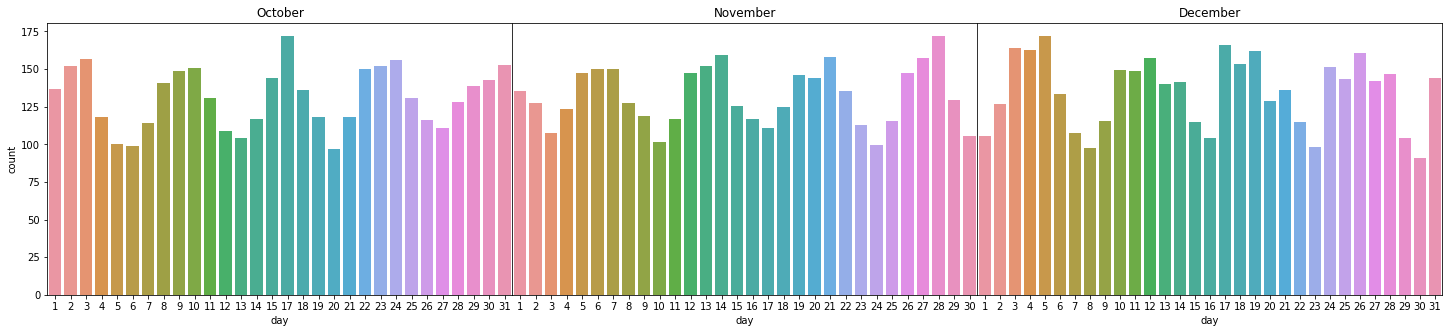

In [153]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.title('October')
sns.countplot(x='day', data=group_by_month.get_group(8))
plt.subplot(1,3,2)
plt.title('November')
sns.countplot(x='day', data=group_by_month.get_group(9))
plt.yticks([])
plt.ylabel("")
plt.subplot(1,3,3)
plt.title('December')
sns.countplot(x='day', data=group_by_month.get_group(10))
plt.yticks([])
plt.ylabel("")
plt.subplots_adjust(wspace=0, hspace=0)

In [154]:
cust = data.groupby('account')
cust=cust.mean().sort_values('balance',ascending=False)

Text(0.5, 1.0, 'Account with highest balance')

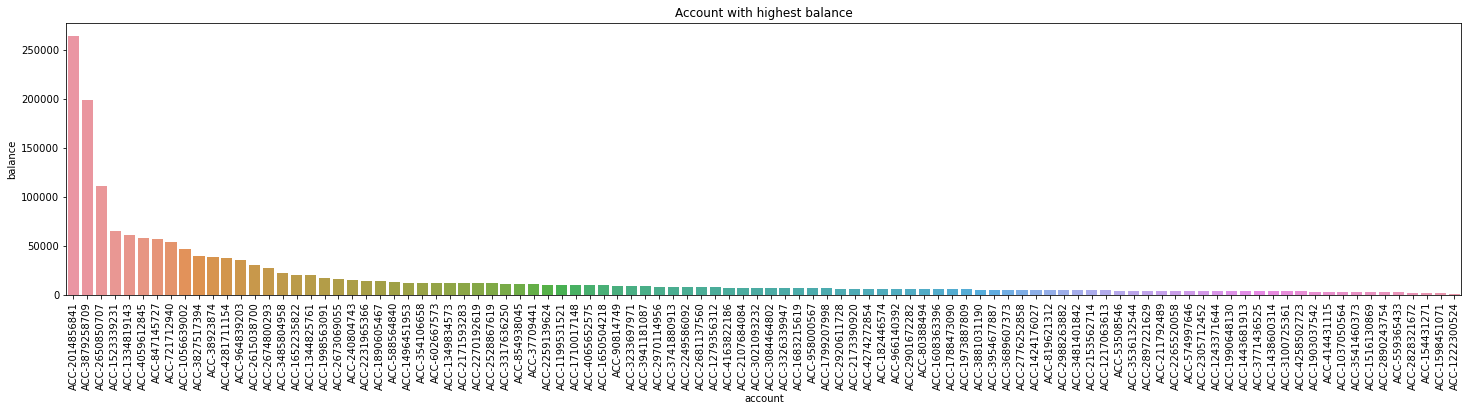

In [155]:
plt.figure(figsize=(25,5))
sns.barplot(x=cust.index, y=cust['balance'])
plt.xticks(rotation=90)
plt.title('Account with highest balance')

Text(0.5, 1.0, 'no. of Debit and Credit transactions in each month')

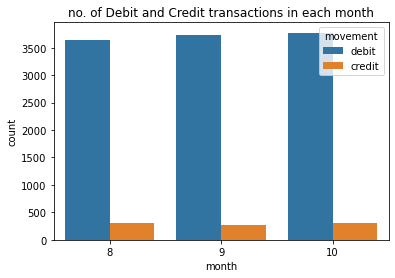

In [156]:
sns.countplot(x='month',hue='movement',data=data)
plt.title('no. of Debit and Credit transactions in each month')

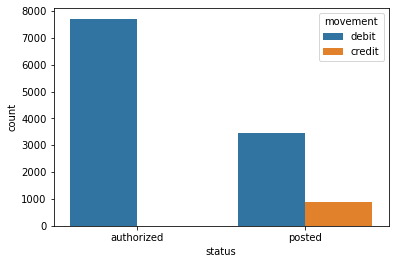

In [157]:
sns.countplot(x='status',hue='movement',data=data)

Text(0.5, 1.0, 'Null Values Heatmap')

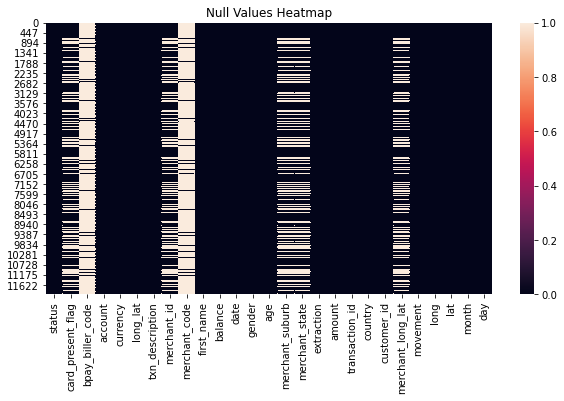

In [158]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.title("Null Values Heatmap")

In [159]:
data.drop((['bpay_biller_code','merchant_code']),axis=1,inplace=True)

Text(0.5, 1.0, 'Null Values Heatmap')

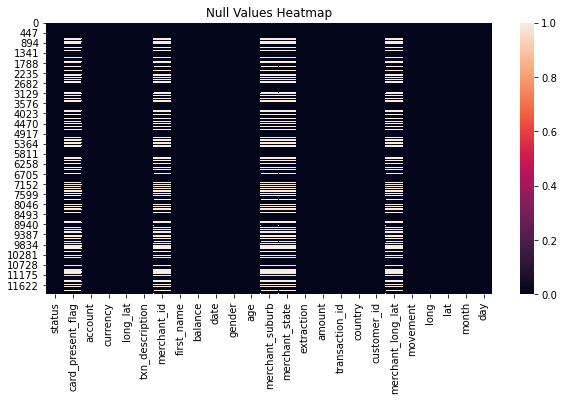

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.title("Null Values Heatmap")

In [161]:
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [162]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [163]:
from mpl_toolkits.basemap import Basemap

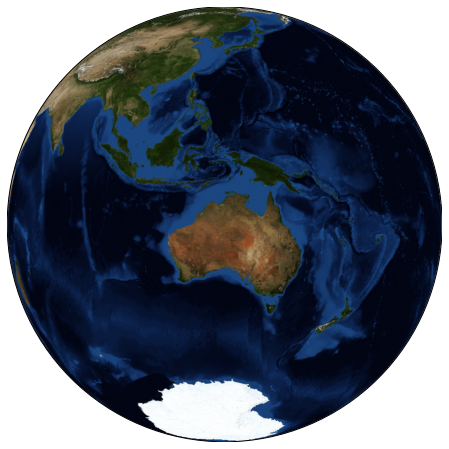

In [164]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=-20, lon_0=130)
m.bluemarble(scale=0.5);

In [165]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=-20, lon_0=130,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(data.long.values, data.lat.values)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);


In [166]:
data['lat']=data['lat'].astype('float64')
data['long']=data['long'].astype('float64')

In [167]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1


In [168]:
data['long'].sort_values()

11667    114.62
7826     114.62
3807     114.62
5359     114.62
3811     114.62
          ...  
2096     255.00
4465     255.00
2034     255.00
10164    255.00
8371     255.00
Name: long, Length: 12043, dtype: float64

In [169]:
data['x'] = np.nan
data['y'] = np.nan
data.loc[:, ['x', 'y']] = data[['long', 'lat']].apply(lambda row: list(m(row['long'], row['lat'])), axis=1, result_type='expand').rename({0: 'x', 1: 'y'}).values

In [170]:
data[['lat', 'long', 'x', 'y']]

,lat,long,x,y
0,-27.95,153.41,8.606993e+06,5.331389e+06
1,-27.95,153.41,8.606993e+06,5.331389e+06
2,-33.94,151.23,8.284952e+06,4.713503e+06
3,-27.66,153.10,8.584919e+06,5.367036e+06
4,-27.95,153.41,8.606993e+06,5.331389e+06
...,...,...,...,...
12038,-29.47,149.83,8.252599e+06,5.210279e+06
12039,-33.87,151.22,8.285664e+06,4.721072e+06
12040,-33.89,151.12,8.276608e+06,4.720082e+06
12041,-37.76,144.96,7.671220e+06,4.369260e+06


Text(0.5, 1.0, 'Locations of customers in Autralia')

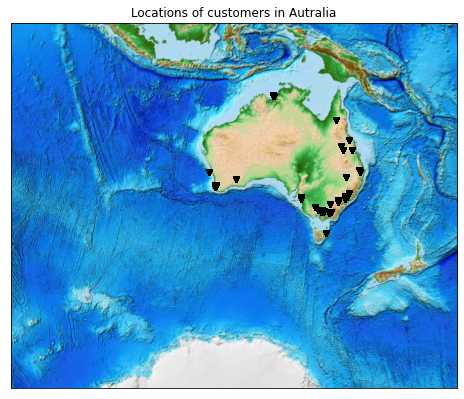

In [171]:
fig = plt.figure(figsize=(8, 10))
m = Basemap(projection='lcc', resolution=None,
            width=11E6, height=9E6, 
            lat_0=-38, lon_0=121,)
m.etopo(scale=0.5, alpha=1)
plt.scatter(data['x'].values, data['y'].values, marker='v', color='k', label='0');
plt.title('Locations of customers in Autralia')

In [172]:
df1 =data[['age','balance']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df1[['balance']])
df1['balance'] = scaler.transform(df1[['balance']])

scaler.fit(df1[['age']])
df1['age'] = scaler.transform(df1[['age']])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Age vs Balance Scatterplot')

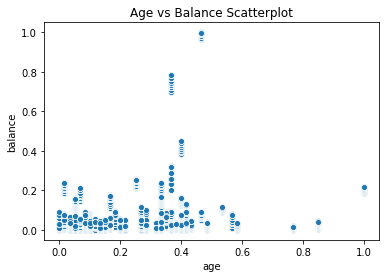

In [173]:
sns.scatterplot(x='age',y='balance',data=df1)
plt.title('Age vs Balance Scatterplot')

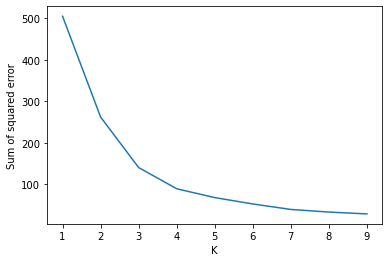

In [174]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['age','balance']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [175]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4,random_state=56)
y_predicted = km.fit_predict(df1[['age','balance']])
y_predicted

array([1, 1, 0, ..., 1, 3, 1], dtype=int32)

In [176]:
df1['cluster']=y_predicted
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,balance,cluster
0,0.133333,0.000132,1
1,0.133333,0.000078,1
2,0.333333,0.000020,0
3,0.366667,0.007925,0
4,0.133333,0.000066,1


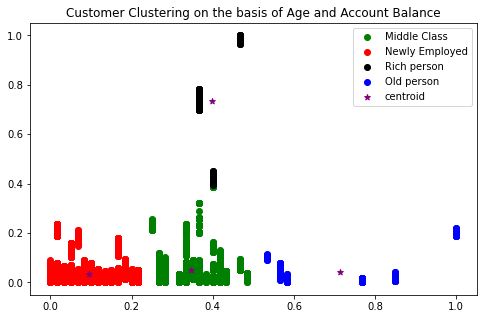

In [177]:
plt.figure(figsize=(8,5))
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]
df5 = df1[df1.cluster==3]
plt.scatter(df2.age,df2['balance'],color='green',label='Middle Class')
plt.scatter(df3.age,df3['balance'],color='red',label='Newly Employed')
plt.scatter(df4.age,df4['balance'],color='black',label='Rich person')
plt.scatter(df5.age,df5['balance'],color='blue',label='Old person')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') 
plt.title('Customer Clustering on the basis of Age and Account Balance')
plt.legend()

In [178]:
data['cluster']=df1['cluster']
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,1
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,1
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1,8.284952e+06,4.713503e+06,0
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1,8.584919e+06,5.367036e+06,0
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,1


In [179]:
data[data['cluster']==3]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster
39,authorized,1.0,ACC-721712940,AUD,145.09 -37.82,POS,9ba904d4-5b0e-403c-b1bc-71e6a2bcdc0f,Andrew,49756.21,2018-08-01,M,78,Preston,VIC,2018-08-01T09:59:35.000+0000,25.70,431119a28af748cbb12920804a7fcda3,Australia,CUS-1646183815,145.03 -37.74,debit,145.09,-37.82,8,1,7.681193e+06,4.361942e+06,3
98,posted,NaN,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit,144.96,-37.76,8,1,7.671220e+06,4.369260e+06,3
163,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,POS,0a1d930e-fed4-4d23-adee-6f46a9ac8bdb,Stephanie,463.96,2018-08-02,F,53,Clayfield,QLD,2018-08-02T08:08:02.000+0000,6.48,498005fec6054a459538a3cb610526e2,Australia,CUS-1005756958,153.05 -27.42,debit,153.03,-27.51,8,2,8.581597e+06,5.384282e+06,3
184,authorized,1.0,ACC-721712940,AUD,145.09 -37.82,POS,3a5629b1-d175-4133-b944-2c178bd78f69,Andrew,49743.84,2018-08-02,M,78,East Melbourne,VIC,2018-08-02T10:12:40.000+0000,12.37,4a820c04e7ae4136a8e2779a2a41eff6,Australia,CUS-1646183815,144.97 -37.81,debit,145.09,-37.82,8,2,7.681193e+06,4.361942e+06,3
185,authorized,1.0,ACC-559365433,AUD,147.31 -42.88,SALES-POS,092cf080-71f6-45f7-a423-23fb0fdc91d7,Mary,159.66,2018-08-02,F,64,Mount Beauty,VIC,2018-08-02T10:29:20.000+0000,31.50,40e386bdc36a45e984537e154039f5af,Australia,CUS-1654129794,147.17 -36.74,debit,147.31,-42.88,8,2,7.760082e+06,3.821620e+06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11871,posted,NaN,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,Stephanie,9310.03,2018-10-30,F,53,NaN,NaN,2018-10-30T16:00:00.000+0000,970.47,1adf440dfa15480395e3baf0899bd9ce,Australia,CUS-1005756958,NaN,credit,153.03,-27.51,10,30,8.581597e+06,5.384282e+06,3
11891,posted,NaN,ACC-1199531521,AUD,116.02 -31.87,PAYMENT,NaN,Billy,20791.08,2018-10-30,M,52,NaN,NaN,2018-10-30T20:00:00.000+0000,20.00,08489cfe9fd1456cbc3fb80e61c388c3,Australia,CUS-134833760,NaN,debit,116.02,-31.87,10,30,5.063897e+06,5.005723e+06,3
11998,authorized,1.0,ACC-1199531521,AUD,116.02 -31.87,POS,4c90fdf3-5b7d-4fdc-b734-8bd894ed6a89,Billy,20773.38,2018-10-31,M,52,Ceduna,SA,2018-10-31T16:37:11.000+0000,17.70,3096bfb888e649b4bccd241077ea5bf0,Australia,CUS-134833760,133.67 -32.12,debit,116.02,-31.87,10,31,5.063897e+06,5.005723e+06,3
12001,posted,NaN,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,144.96,-37.76,10,31,7.671220e+06,4.369260e+06,3


In [180]:
data['cluster'] = data['cluster'].map({0:'Middle Class',1:'Newly Employed',2:'Rich person',3:'Old person'})

In [181]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1,8.284952e+06,4.713503e+06,Middle Class
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1,8.584919e+06,5.367036e+06,Middle Class
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed


In [182]:
data.loc[data['cluster']=='Rich person'].sort_values(by='balance')['first_name'].value_counts()

Natasha    151
Patrick     67
Brian       58
Name: first_name, dtype: int64

In [183]:
dfx=data.loc[data['cluster']=='Rich person'].sort_values(by='balance')
dfx['first_name'].value_counts()

Natasha    151
Patrick     67
Brian       58
Name: first_name, dtype: int64

In [184]:
dfy=data.loc[data['cluster']=='Newly Employed'].sort_values(by='balance')
dfz=data.loc[data['cluster']=='Middle Class'].sort_values(by='balance')
dfw=data[data['cluster']=='Old person'].sort_values(by='balance')

In [185]:
dfw

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster
830,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,f0f84efb-7f8f-4690-a526-800ecfaf2425,Stephanie,41.40,2018-08-07,F,53,Ripley,QLD,2018-08-07T14:33:31.000+0000,11.17,82622984ad4f42749c8d4a996d8903f9,Australia,CUS-1005756958,152.78 -27.67,debit,153.03,-27.51,8,7,8.581597e+06,5.384282e+06,Old person
801,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,0e983d91-5ce0-4c47-9463-8e9f9642b7b6,Stephanie,52.57,2018-08-07,F,53,Woolgoolga,NSW,2018-08-07T10:17:23.000+0000,13.96,055d4ad23d784dfa9ff71b916d159847,Australia,CUS-1005756958,153.18 -30.11,debit,153.03,-27.51,8,7,8.581597e+06,5.384282e+06,Old person
765,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,8bea91a6-d6b5-48ae-9550-7e04f054afad,Stephanie,66.53,2018-08-07,F,53,Kedron,QLD,2018-08-07T01:33:47.000+0000,33.70,ddb1d7e4dccf47838cac4a26192d773c,Australia,CUS-1005756958,153.03 -27.41,debit,153.03,-27.51,8,7,8.581597e+06,5.384282e+06,Old person
690,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,30eaeda0-a350-4df7-b327-0fae3381afd6,Stephanie,100.23,2018-08-06,F,53,Kippa Ring,QLD,2018-08-06T09:45:52.000+0000,16.66,98cb904a78b94b348ad3210060b526f9,Australia,CUS-1005756958,153.09 -27.23,debit,153.03,-27.51,8,6,8.581597e+06,5.384282e+06,Old person
598,authorized,1.0,ACC-2828321672,AUD,153.03 -27.51,POS,08f74284-341e-463d-b282-7d8263e1d3b9,Stephanie,116.89,2018-08-05,F,53,Upper Mount Gravatt,QLD,2018-08-05T10:08:22.000+0000,17.89,4fc8940fa62e42c0a4d0faaa5a9a0db4,Australia,CUS-1005756958,153.08 -27.56,debit,153.03,-27.51,8,5,8.581597e+06,5.384282e+06,Old person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,posted,NaN,ACC-721712940,AUD,145.09 -37.82,PAYMENT,NaN,Andrew,57899.74,2018-10-19,M,78,NaN,NaN,2018-10-19T21:00:00.000+0000,38.00,eae4ddf55ba54147993fe9e8c6210775,Australia,CUS-1646183815,NaN,debit,145.09,-37.82,10,19,7.681193e+06,4.361942e+06,Old person
10426,posted,NaN,ACC-721712940,AUD,145.09 -37.82,PHONE BANK,NaN,Andrew,57937.74,2018-10-19,M,78,NaN,NaN,2018-10-19T13:00:00.000+0000,150.00,003cb9026b5b4635983e4efa07505db4,Australia,CUS-1646183815,NaN,debit,145.09,-37.82,10,19,7.681193e+06,4.361942e+06,Old person
10276,posted,NaN,ACC-721712940,AUD,145.09 -37.82,PAY/SALARY,NaN,Andrew,58087.74,2018-10-18,M,78,NaN,NaN,2018-10-18T12:00:00.000+0000,782.42,e2e097ad364d46aabe0cac5ad43c10cb,Australia,CUS-1646183815,NaN,credit,145.09,-37.82,10,18,7.681193e+06,4.361942e+06,Old person
11408,posted,NaN,ACC-721712940,AUD,145.09 -37.82,PAYMENT,NaN,Andrew,58497.16,2018-10-26,M,78,NaN,NaN,2018-10-26T21:00:00.000+0000,38.00,1312712f3bde4c55bb11bee8e0a04949,Australia,CUS-1646183815,NaN,debit,145.09,-37.82,10,26,7.681193e+06,4.361942e+06,Old person


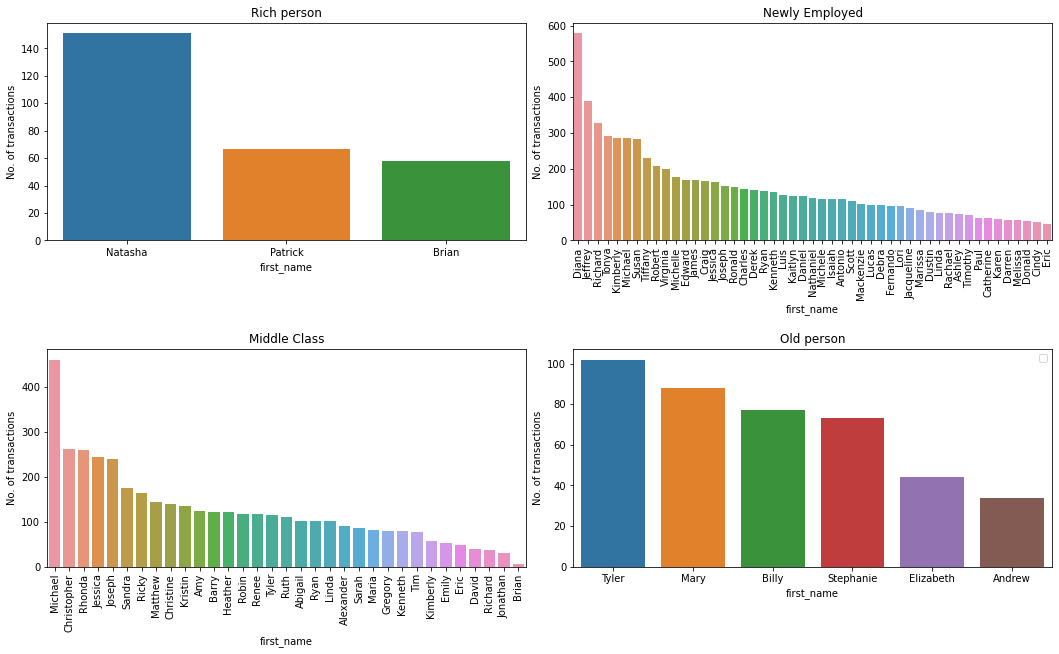

In [186]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('Rich person')
sns.countplot(dfx['first_name'],order=dfx['first_name'].value_counts().index)
plt.ylabel('No. of transactions')
plt.subplot(2,2,2)
plt.xticks(rotation=90)
plt.ylabel('No. of transactions')
plt.title('Newly Employed')
sns.countplot(dfy['first_name'],order=dfy['first_name'].value_counts().index)
plt.ylabel('No. of transactions')
plt.subplot(2,2,3)
plt.xticks(rotation=90)
plt.title('Middle Class')
sns.countplot(dfz['first_name'],order=dfz['first_name'].value_counts().index)
plt.ylabel('No. of transactions')
plt.subplot(2,2,4)
plt.title('Old person')
sns.countplot(dfw['first_name'],order=dfw['first_name'].value_counts().index)
plt.ylabel('No. of transactions')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

In [187]:
data['cluster'].value_counts()

Newly Employed    7226
Middle Class      4123
Old person         418
Rich person        276
Name: cluster, dtype: int64

In [188]:
balance_df = data[['account','first_name','balance','cluster']]
account_group=balance_df.groupby(['account','first_name','cluster'])

In [189]:
new_df=account_group.mean()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

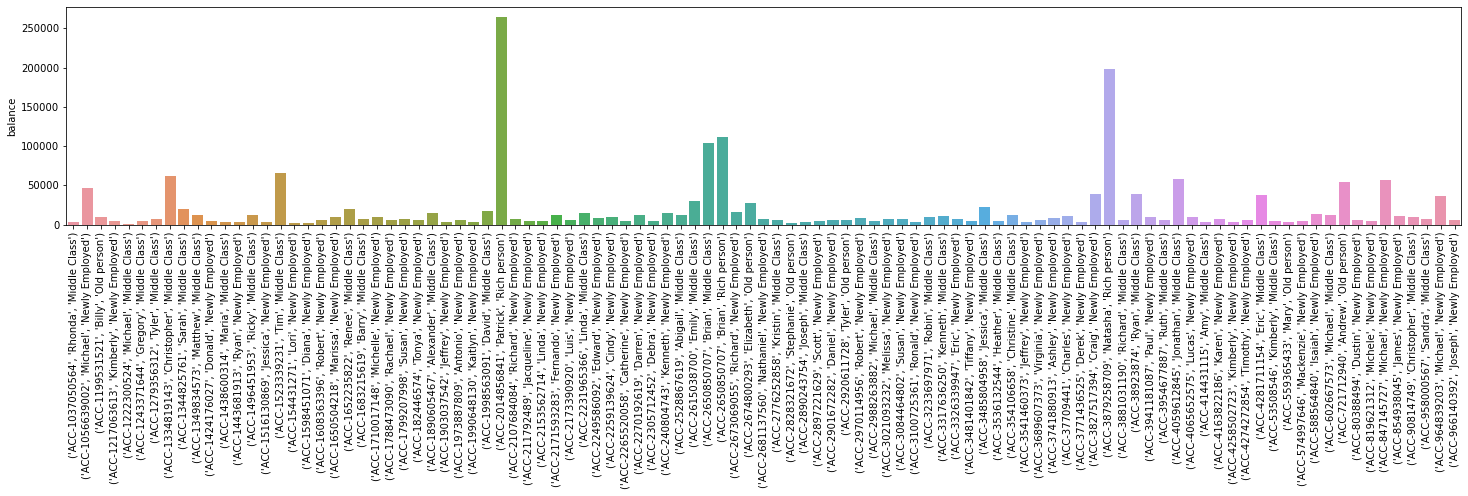

In [190]:
plt.figure(figsize=(25,4))
sns.barplot(x=new_df.index,y=new_df['balance'])
plt.xticks(rotation=90)

In [191]:
new_df.reset_index(inplace=True)

In [192]:
new_df.iloc[43:48]

,account,first_name,cluster,balance
43,ACC-240804743,Kenneth,Newly Employed,14973.528955
44,ACC-2528867619,Abigail,Middle Class,11747.912549
45,ACC-2615038700,Emily,Middle Class,30331.218654
46,ACC-2650850707,Brian,Middle Class,103311.334000
47,ACC-2650850707,Brian,Rich person,111989.544483


In [193]:
new_df.drop(new_df.index[46],inplace=True)

In [194]:
new_df.reset_index(inplace=True)
new_df.iloc[43:48]

,index,account,first_name,cluster,balance
43,43,ACC-240804743,Kenneth,Newly Employed,14973.528955
44,44,ACC-2528867619,Abigail,Middle Class,11747.912549
45,45,ACC-2615038700,Emily,Middle Class,30331.218654
46,47,ACC-2650850707,Brian,Rich person,111989.544483
47,48,ACC-2673069055,Richard,Newly Employed,16385.831632


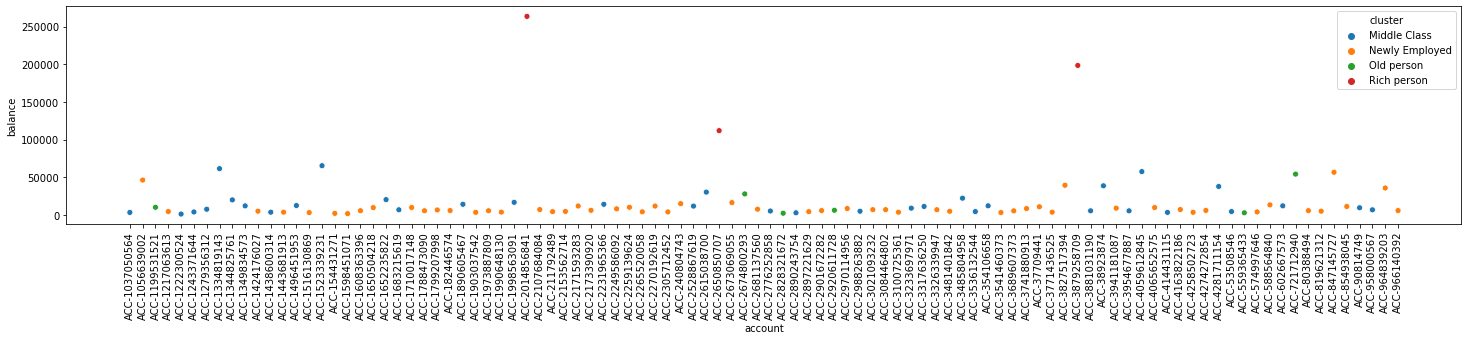

In [195]:
plt.figure(figsize=(25,4))
plt.xticks(rotation=90)
# plt.xticks(new_df.index, new_df.first_name,rotation=90)  
sns.scatterplot(x=new_df['account'],y=new_df['balance'],hue=new_df['cluster'])

Text(0.5, 1.0, "Each customer's balance with respect to their cluster")

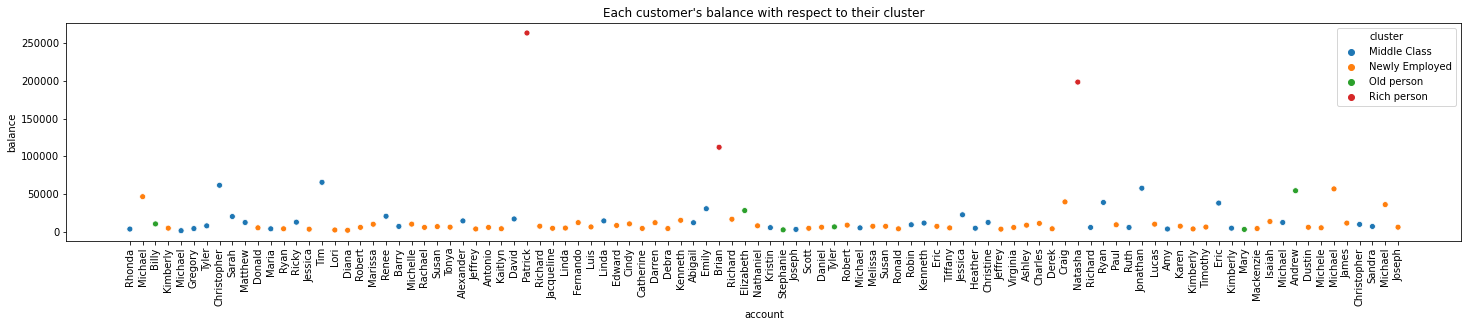

In [196]:
plt.figure(figsize=(25,4))
plt.xticks(new_df.index, new_df.first_name,rotation=90)  
sns.scatterplot(x=new_df['account'],y=new_df['balance'],hue=new_df['cluster'])
plt.title("Each customer's balance with respect to their cluster")

In [197]:
df1=pd.get_dummies(data=data, columns=['gender'],drop_first = True)

In [198]:
data1=df1[(df1['txn_description']=='PAY/SALARY')]

In [199]:
data1

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster,gender_M
50,posted,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,2018-08-01,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,151.27,-33.76,8,1,8.292436e+06,4.732219e+06,Newly Employed,1
61,posted,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,2018-08-01,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,145.01,-37.93,8,1,7.672462e+06,4.351013e+06,Newly Employed,0
64,posted,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,2018-08-01,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,151.18,-33.80,8,1,8.283787e+06,4.728987e+06,Newly Employed,1
68,posted,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,2018-08-01,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,145.00,-37.83,8,1,7.673382e+06,4.361594e+06,Newly Employed,1
70,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,2018-08-01,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,144.95,-37.76,8,1,7.670371e+06,4.369338e+06,Middle Class,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,Antonio,9378.51,2018-10-31,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,115.78,-31.90,10,31,5.042349e+06,5.000589e+06,Newly Employed,1
12000,posted,NaN,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,Michele,3440.01,2018-10-31,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,145.04,-37.85,10,31,7.676421e+06,4.359181e+06,Newly Employed,0
12001,posted,NaN,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,Tyler,11381.44,2018-10-31,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,144.96,-37.76,10,31,7.671220e+06,4.369260e+06,Old person,1
12003,posted,NaN,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,Susan,11454.52,2018-10-31,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,150.68,-33.79,10,31,8.240853e+06,4.735698e+06,Newly Employed,0


In [202]:
data2=df1[(df1['txn_description']!='PAY/SALARY')]

In [203]:
data2

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster,gender_M
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1,8.284952e+06,4.713503e+06,Middle Class,1
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1,8.584919e+06,5.367036e+06,Middle Class,0
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,149.83,-29.47,10,31,8.252599e+06,5.210279e+06,Newly Employed,0
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87,10,31,8.285664e+06,4.721072e+06,Newly Employed,1
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89,10,31,8.276608e+06,4.720082e+06,Newly Employed,1
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76,10,31,7.671220e+06,4.369260e+06,Old person,1


In [208]:
data3 = data1[['age','balance','gender_M','amount']]

In [209]:
data3

,age,balance,gender_M,amount
50,23,8342.11,1,3903.95
61,23,2040.58,0,1626.48
64,22,3158.51,1,983.36
68,24,2517.66,1,1408.08
70,43,2271.79,0,1068.04
...,...,...,...,...
11995,26,9378.51,1,1098.91
12000,30,3440.01,0,1158.15
12001,69,11381.44,1,1043.12
12003,20,11454.52,0,1395.49


In [212]:
X=data3[['age','balance','gender_M']]
y=data3[['amount']]

In [214]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
reg.score(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)
rf.score(X,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.930676894023923

In [221]:
X_test = data2[['age','balance','gender_M']]

In [222]:
y_pred=rf.predict(X_test)

In [228]:
data2['salary']=y_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
data2

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,month,day,x,y,cluster,gender_M,salary
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0,995.1196
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0,995.1196
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1,8.284952e+06,4.713503e+06,Middle Class,1,992.1096
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1,8.584919e+06,5.367036e+06,Middle Class,0,1074.6453
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1,8.606993e+06,5.331389e+06,Newly Employed,0,995.1196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,149.83,-29.47,10,31,8.252599e+06,5.210279e+06,Newly Employed,0,1871.5193
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87,10,31,8.285664e+06,4.721072e+06,Newly Employed,1,2120.5961
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89,10,31,8.276608e+06,4.720082e+06,Newly Employed,1,3928.4398
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76,10,31,7.671220e+06,4.369260e+06,Old person,1,1409.1154


In [232]:
data5=data2.groupby(['account','first_name']).mean()

In [233]:
data5

,,card_present_flag,balance,age,amount,long,lat,month,day,x,y,gender_M,salary
account,first_name,,,,,,,,,,,,
ACC-1037050564,Rhonda,0.827273,3298.238780,40.0,31.257195,153.10,-27.66,8.939024,14.443089,8.584919e+06,5.367036e+06,0,1175.460936
ACC-1056639002,Michael,0.775862,46085.282750,22.0,45.394125,145.03,-37.91,8.725000,14.462500,7.674511e+06,4.352958e+06,1,3043.161973
ACC-1199531521,Billy,0.744186,9937.667143,52.0,82.038714,116.02,-31.87,8.800000,18.828571,5.063897e+06,5.005723e+06,1,2903.908916
ACC-1217063613,Kimberly,0.785714,4306.916957,27.0,40.238261,147.61,-37.82,9.739130,12.000000,7.893575e+06,4.340633e+06,0,2391.785213
ACC-1222300524,Michael,0.818841,1165.981724,38.0,36.788828,151.23,-33.94,9.034483,16.779310,8.284952e+06,4.713503e+06,1,1005.708708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-854938045,James,0.808696,11188.645494,28.0,54.017222,147.63,-22.84,9.024691,15.895062,8.149281e+06,5.961014e+06,1,2417.225155
ACC-90814749,Christopher,0.779070,9456.808390,35.0,59.040508,151.68,-32.98,8.889831,14.627119,8.345330e+06,4.810700e+06,1,2324.066429
ACC-958000567,Sandra,0.750000,6722.353054,34.0,71.646587,130.90,-12.37,9.029940,15.802395,6.468745e+06,7.216646e+06,0,2199.672019
